## Scraping

In [10]:
#source = requests.get('http://localhost:8080/ui/termos').text
from selenium import webdriver
import time

In [52]:
driver=webdriver.Chrome('D:\\dev\\projetos\\tcc_data_science\\chromedriver.exe')
regioes = ["regiao-1", "regiao-2"]
for regiao in regioes:
    for i in range(1,5):
        time.sleep(0.5)
        if i==1:
#             driver.get(f'https://www.wimoveis.com.br/imoveis-aluguel-{regiao}-df.html')
            print(f'https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-{regiao}-df.html')
        else:
#             driver.get(f'https://www.wimoveis.com.br/imoveis-aluguel-{regiao}-df-pagina-{i}.html')
            print(f'https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-{regiao}-df-pagina-{i}.html')
#         html = driver.page_source
#         f = open(f'{regiao}_page{i}.html', "a")
#         f.write(html)
#         f.close()

https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-1-df.html
https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-1-df-pagina-2.html
https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-1-df-pagina-3.html
https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-1-df-pagina-4.html
https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-2-df.html
https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-2-df-pagina-2.html
https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-2-df-pagina-3.html
https://www.siteexemplodeanuncios.com.br/imoveis-aluguel-regiao-2-df-pagina-4.html


## Beautiful Soup - open file and commands

In [200]:
from bs4 import BeautifulSoup
import os
import requests
import re
import datetime

In [216]:
#arquivo para logar execução da extração dos dados para eventual verificação
log = open(f'execution_log.txt', "a", encoding="utf-8")
log.write('------------------------------------------------------------------------\n')
log.write(f"inicio_execucao_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}\n")

dataset = open(f'dataset.csv', "a", encoding="utf-8")
dataset.write("regiao,area,quartos,banheiros,garagens,condominio,aluguel\n")

# assign directory
directory = 'data_samples'

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        with open(f) as html_file:
            soup = BeautifulSoup(html_file, 'lxml')
        log.write(f"filename: {f}\n")    
        propertiesCards = soup.find_all('div', class_='postingCardInfo')
        print("quantidade de cards encontrados: ", len(propertiesCards))
        # print("example: \n", propertiesCards[0])
        for index, apto in enumerate(propertiesCards):
            log.write(f"index: {index}\n")
            preco = ''
            cond = ''
            area = ''
            beds = ''
            baths = ''
            garages = ''
            try:
                log.write(f"in: {apto.find(class_='firstPrice').text}\n")
                preco = re.search(r'\d+\.?\d+', apto.find(class_="firstPrice").text).group(0).replace('.', '')
                log.write(f"out: {preco}\n")
            except Exception as e:
                print(e)
            try:
                log.write(f"in: {apto.find(class_='postingCardExpenses').text}\n")
                cond = re.search(r'\d+\.?\d+', apto.find(class_="postingCardExpenses").text).group(0).replace('.', '')
                log.write(f"out: {cond}\n")
            except Exception as e:
                print(e)
            mainFeatures = apto.find_all('ul', class_="postingCardMainFeatures")
            for item in mainFeatures:
                listOfLis = item.find_all('li')
                for li in listOfLis:
                    if li.find('i', class_="iconArea"):
                        try:
                            log.write(f"in: {li.text}\n")
                            area = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '')
                            log.write(f"out: {area}\n")
                        except Exception as e:
                            print(e)                
                    if li.find('i', class_="iconBathrooms"):
                        try:
                            log.write(f"in: {li.text}\n")
                            baths = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '')
                            log.write(f"out: {baths}\n")
                        except Exception as e:
                            print(e)
                    if li.find('i', class_="iconBedrooms"):
                        try:
                            log.write(f"in: {li.text}\n")
                            beds = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '')
                            log.write(f"out: {baths}\n")
                        except Exception as e:
                            print(e)
                    if li.find('i', class_="iconGarage"):
                        try:
                            log.write(f"in: {li.text}\n")
                            garages = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '') 
                            log.write(f"out: {garages}\n")
                        except Exception as e:
                            print(e)                     
                dataset.write(f'{filename.split("_")[0]},{area},{beds},{baths},{garages},{cond},{preco}\n') 

log.write(f"fim_execucao_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}\n")
log.close()
dataset.close()

quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
quantidade de cards encontrados:  21
'NoneType' object has no attribute 'text'


## Generating dummy data for tests

In [53]:
import random
with open('aptos.csv', 'w') as myFile:
    myFile.write('area,bedrooms,baths,garage,rent\n')
    for i in range(1, 1001):
        flat = [random.choice([50, 60, 70, 100]),random.choice([1, 2, 4]),random.choice([1, 2]),random.choice([0,1])]
        rent = flat[0]*(random.choice([22.3, 25.7, 31])) + flat[1]*(random.choice([322.3, 325.7, 280])) + flat[2]*150 + flat[3]*55 - 320
        myFile.write(f'{flat[0]},{flat[1]},{flat[2]},{flat[3]},{rent}\n')

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
df = pd.read_csv('aptos.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      1000 non-null   int64  
 1   bedrooms  1000 non-null   int64  
 2   baths     1000 non-null   int64  
 3   garage    1000 non-null   int64  
 4   rent      1000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


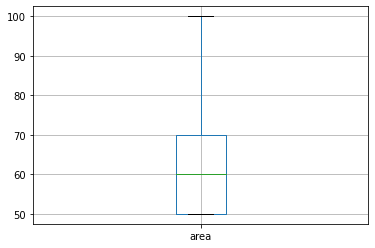

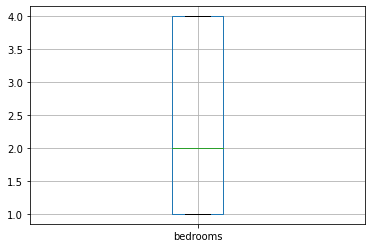

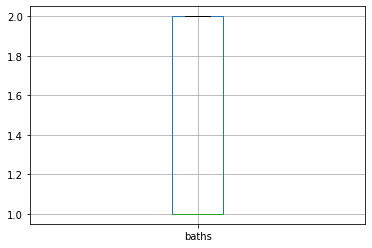

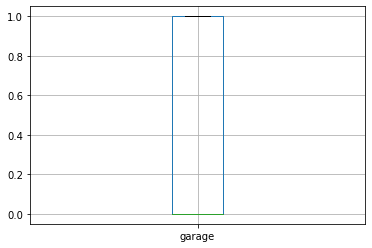

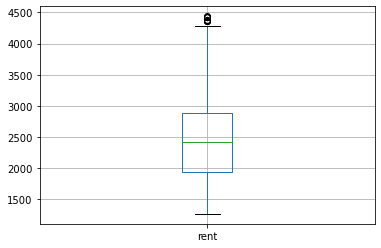

In [57]:
import matplotlib.pyplot as plt

for column in df:
    plt.figure()
    df.boxplot([column])

In [58]:
X = df.iloc[:,0:4]

In [59]:
y = df.iloc[:, -1]

In [60]:
X, y

(     area  bedrooms  baths  garage
 0      70         4      1       0
 1      70         4      2       0
 2      70         1      2       0
 3      60         2      1       1
 4      50         2      1       1
 ..    ...       ...    ...     ...
 995   100         2      1       0
 996    70         2      1       1
 997   100         4      1       1
 998    70         1      1       0
 999    70         1      1       1
 
 [1000 rows x 4 columns],
 0      2931.8
 1      3270.0
 2      2059.0
 3      2071.6
 4      1821.4
         ...  
 995    3044.6
 996    2244.0
 997    4287.8
 998    1909.0
 999    2006.3
 Name: rent, Length: 1000, dtype: float64)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [62]:
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: ", lr.coef_)
print("lr.intercept_): ", lr.intercept_)

lr.coef_:  [ 25.89640156 313.92888452 131.33255003  69.96500626]
lr.intercept_):  -283.28974750957013


In [63]:
print("training score:\n", lr.score(X_train, y_train))
print("test score\n", lr.score(X_test, y_test))


training score:
 0.8564338418687985
test score
 0.8438631426315073


## Ridge

In [64]:
from sklearn.linear_model import Ridge

In [65]:
ridge = Ridge().fit(X_train, y_train)
print("lr.coef_: ", lr.coef_)
print("lr.intercept_): ", lr.intercept_)

lr.coef_:  [ 25.89640156 313.92888452 131.33255003  69.96500626]
lr.intercept_):  -283.28974750957013


In [66]:
print("training score:\n", ridge.score(X_train, y_train))
print("test score\n", ridge.score(X_test, y_test))

training score:
 0.8564332723265946
test score
 0.8438444497476394
